In [1]:
import sys
import os
import pandas as pd
from pprint import pprint
wd = %pwd
parent = os.path.dirname(wd)
fdel = os.path.sep
sys.path.append(parent+fdel+"src")
from tedata import TE_Scraper

INFO - tedata package initialized successfully!


In [2]:
# Test the scaling plot
url = 'https://tradingeconomics.com/united-states/personal-income'
scr = TE_Scraper(use_existing_driver = False, headless = True)  ## Initialize a new TE_scraper object.
scr.load_page(url, extra_wait_time=5) 

scr.scrape_metadata() ## Scrape the metadata for the data series from the page.
scr.make_x_index(force_rerun_freqdet=True, force_rerun_xlims=True)
scr.get_y_axis(set_global_y_axis=True) 
scr.series_from_chart_soup(set_max_datespan=True)
scr.apply_x_index()
    

INFO - New firefox webdriver created.
INFO - Chart types dictionary created successfully: dict_keys(['Column', 'Spline', 'Areaspline', 'Stepline', 'Line', 'Area'])
INFO - Date span set to: 1Y
INFO - 
Series metadata: 
 {'units': '%', 'original_source': 'U.S. Bureau of Economic Analysis', 'title': 'United States Personal Income', 'indicator': 'personal income', 'country': 'united states', 'source': 'Trading Economics', 'id': 'united-states/personal-income'}


Using selenium and tooltip scraping to construct the date time index for the time-series, this'll take a bit...


INFO - Chart type set to: Spline


Time taken to select chart type: 2.3515331700327806
Time taken to load JS code: 0.0008734010043554008


INFO - JS Console: Starting cursor movement, target points: 10
INFO - JS Console: Using increment: 5px
INFO - JS Console: Using wait time: 25ms
INFO - JS Console: Chart dimensions: [object DOMRect]
INFO - JS Console: Found data point: Jan 2025 = 0.9%
INFO - JS Console: Found data point: Dec 2024 = 0.4%
INFO - JS Console: Found data point: Nov 2024 = 0.3%
INFO - JS Console: Found data point: Oct 2024 = 0.6%
INFO - JS Console: Found data point: Sep 2024 = 0.3%
INFO - JS Console: Found data point: Aug 2024 = 0.1%
INFO - JS Console: Found data point: Jul 2024 = 0.2%
INFO - JS Console: Found data point: Jun 2024 = 0.2%
INFO - JS Console: Found data point: May 2024 = 0.3%
INFO - JS Console: Found data point: Apr 2024 = 0.1%
INFO - JS Console: Collected 10 points, finishing...


Time taken to execute JS code: 2.9803825760027394
Latest dates:  ['Jan 2025', 'Dec 2024', 'Nov 2024', 'Oct 2024', 'Sep 2024', 'Aug 2024', 'Jul 2024', 'Jun 2024', 'May 2024', 'Apr 2024']
Frequency of time-series:  MS
get_xlims_from_tooltips method: date_span:  1Y , chart_type: splineChart


INFO - Chart type set to: Spline


Got chart dimensions and plot background element.


INFO - Start and end values scraped from tooltips: 
{'start_date': Timestamp('1959-02-01 00:00:00'), 'start_value': 0.5, 'unit_str': '%', 'end_date': Timestamp('2025-01-01 00:00:00'), 'end_value': 0.9}
INFO - DateTimeIndex created successfully for the time-series.
INFO - Y-axis values scraped successfully.


Start and end dates scraped from tooltips:  {'start_date': Timestamp('1959-02-01 00:00:00'), 'start_value': 0.5, 'unit_str': '%', 'end_date': Timestamp('2025-01-01 00:00:00'), 'end_value': 0.9}
y_heights:  [335.5, 320.5, 269.5, 217.5, 165.5, 114.5, 62.5, 39.5]
pixheights:  [335.5, 320.5, 269.5, 217.5, 165.5, 114.5, 62.5, 39.5]


INFO - Series path extraction method: Extracting series data from chart soup.
INFO - Date span: MAX. Chart type: splineChart, URL: https://tradingeconomics.com/united-states/personal-income.
INFO - DateTimeIndex applied to series, series attribute updated.


In [23]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 140

In [75]:
scr.series = scr.series.max() - scr.series

In [77]:
scr.series = scr.unscaled_series

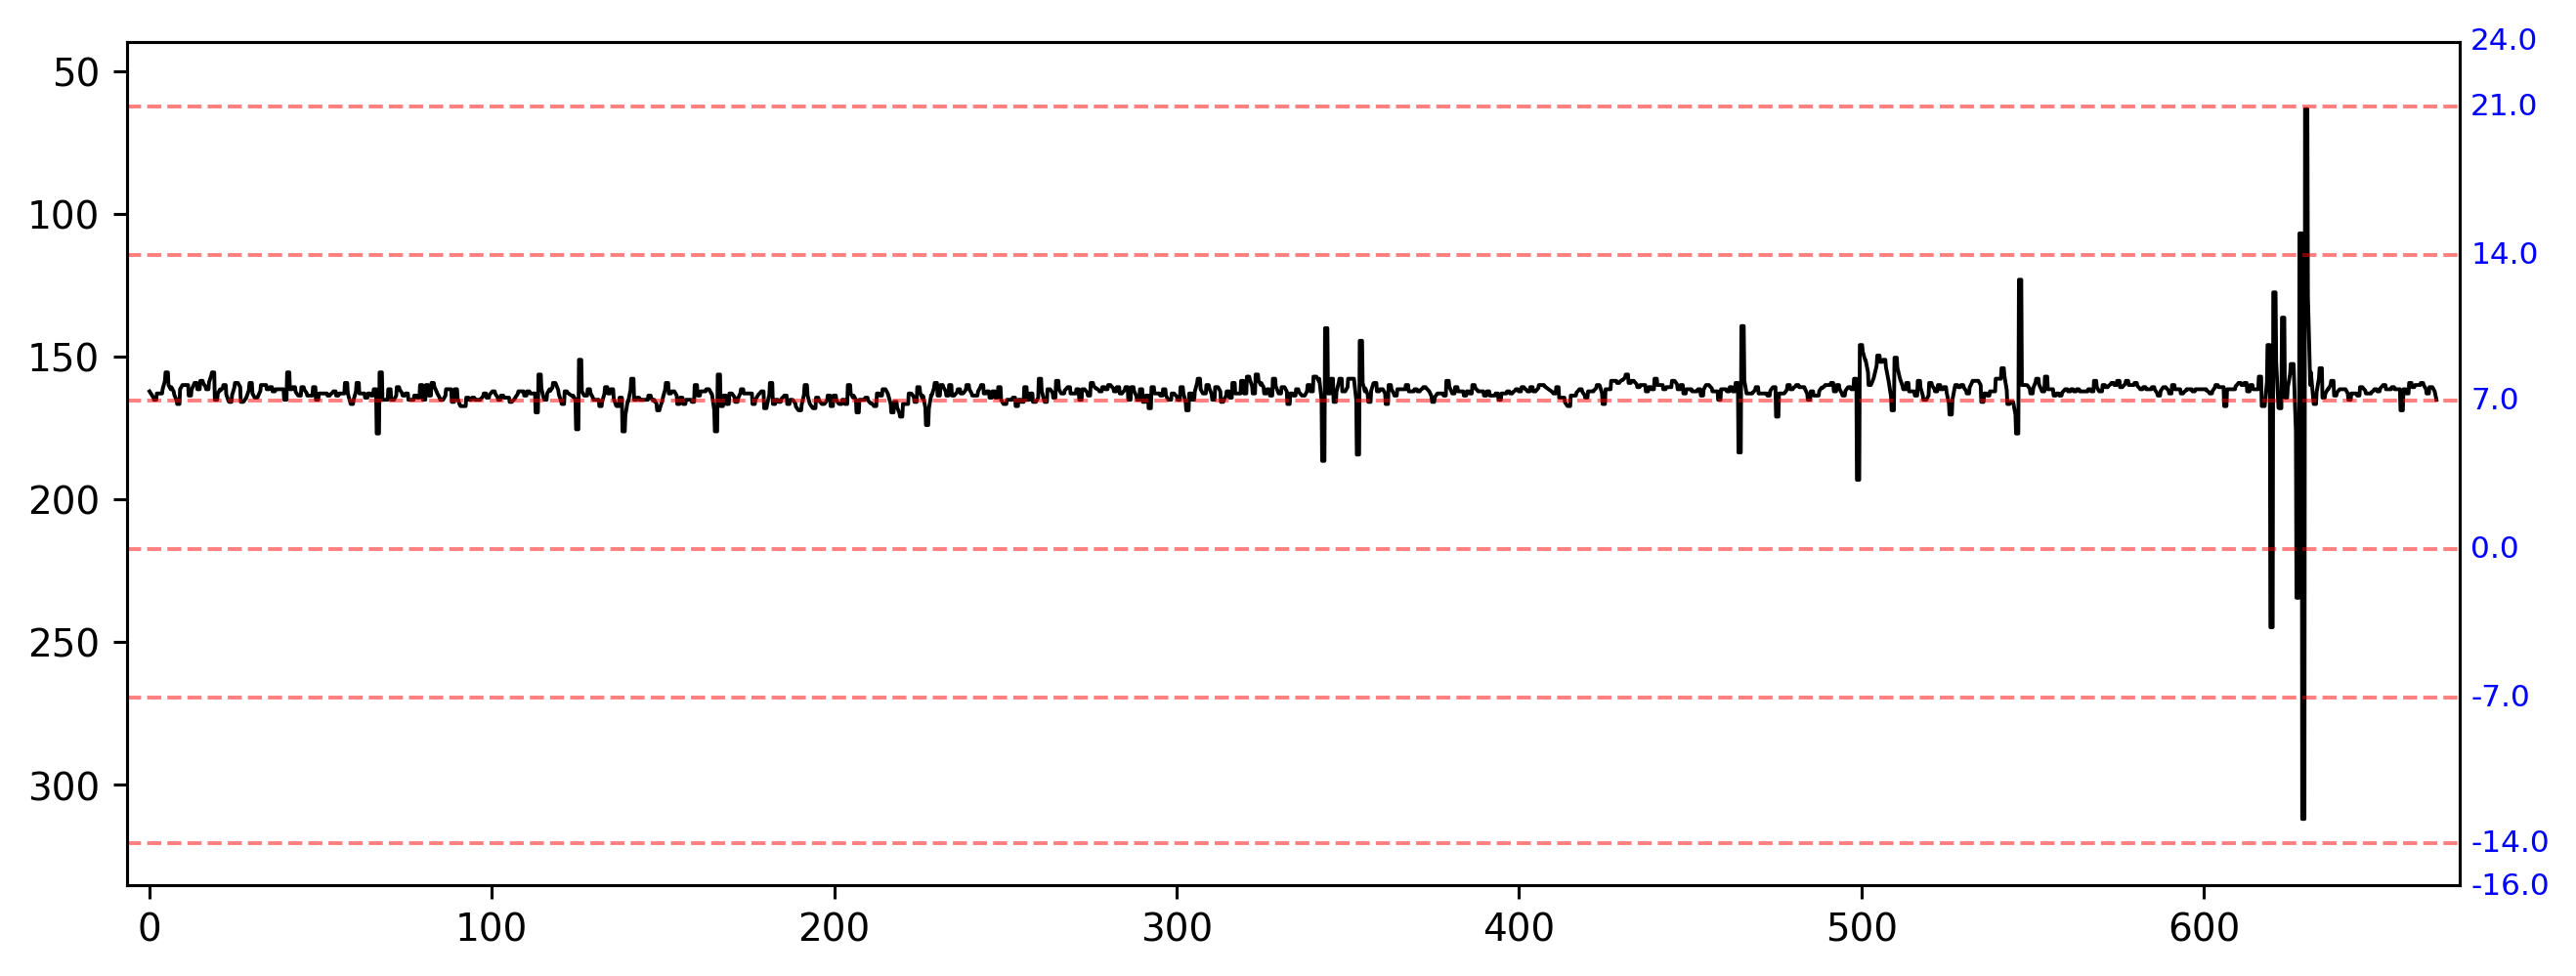

In [ ]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.plot(scr.series, label = 'Unscaled series', lw = 1, c = 'black')
ax.set_ylim(scr.axis_limits["y_min"], scr.axis_limits["y_max"])
ax.margins(0.01, 0.02)
for px_pos, value in zip(scr.y_axis.index, scr.y_axis.values):
    ax.axhline(y=px_pos, color='r', linestyle='--', alpha=0.5, lw = 1)
    ax.text(max(scr.unscaled_series.index)+10, px_pos, 
            f"{value}", va='center', ha='left', fontsize=8, color='b')